In [70]:
import shapely.geometry as sg
import shapely
import numpy as np
import random
import math

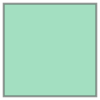

In [4]:
box_min,box_max = 0,10

box1 = sg.box(0,0,10,10)
box1

In [5]:
pts_per_side = 2

In [6]:
side1 = np.random.randint(box_min+1,box_max*10,(pts_per_side))/10
side1.sort()
side2 = np.random.randint(box_min+1,box_max*10,(pts_per_side))/10
side2.sort()
side3 = np.random.randint(box_min+1,box_max*10,(pts_per_side))/10
side3[::-1].sort()
side4 = np.random.randint(box_min+1,box_max*10,(pts_per_side))/10
side4[::-1].sort()

In [7]:
# actual corners 
BL= [(box_min,box_min)]
TL = [(box_min,box_max)]
TR = [(box_max,box_max)]
BR = [(box_max, box_min)]


In [8]:
# make points
# side1_new = BL+ [(box_min,x) for x in side1]+ TL
# side1_pts = [sg.Point(p) for pc in side1_new]
# side1_mpts = sg.MultiPoint(side1_pts)
# side2_pts = [sg.Point(x,box_max) for x in side2]
# side2_mpts = sg.MultiPoint(side2_pts)
# side3_pts = [sg.Point(x,box_min) for x in side3]
# side3_mpts = sg.MultiPoint(side3_pts)
# side4_pts = [sg.Point(box_max,x) for x in side4]
# side4_mpts = sg.MultiPoint(side4_pts)

In [9]:
side1_new = BL+ [(box_min,x) for x in side1]
side1_pts = [sg.Point(p) for p in side1_new]
side1_mpts = sg.MultiPoint(side1_pts)

side2_new = TL+ [(x,box_max) for x in side2]
side2_pts = [sg.Point(p) for p in side2_new]
side2_mpts = sg.MultiPoint(side2_pts)

side3_new = TR+ [(box_max,x) for x in side3]
side3_pts = [sg.Point(p) for p in side3_new]
side3_mpts = sg.MultiPoint(side3_pts)

side4_new = BR+ [(x,box_min) for x in side4]+ BL
side4_pts = [sg.Point(p) for p in side4_new]
side4_mpts = sg.MultiPoint(side4_pts)
# side1_mpts

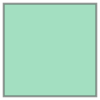

In [10]:
degenerate_geom = sg.Polygon(side1_pts + side2_pts + side3_pts + side4_pts)
degenerate_geom


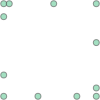

In [11]:
side1_mpts.union(side2_mpts).union(side3_mpts).union(side4_mpts)

In [12]:
# verify got too many pts than needed for a box
len(degenerate_geom.exterior.coords[:]) 

13

In [13]:
degenerate_geom.exterior.is_ccw


False

In [14]:
# shapely.geometry.polygon.orient(polygon, sign=1.0)
dg2 = sg.polygon.orient(degenerate_geom,sign=1.0)

In [15]:
dg2.exterior.is_ccw

True

In [37]:
def get_angles(vec_1,vec_2):
    dot = np.dot(vec_1, vec_2)
    det = np.cross(vec_1,vec_2)
    angle_rad = np.arctan2(det,dot)
    return np.degrees(angle_rad)


def simplify_by_interior_angle(poly_in, deg_tol = 5):
    """
    attempt to get persistent coordinate points that remain after
    simplify, convex hul, etc
    
    """
    
    ext_poly_coords = poly_in.exterior.coords[:]
#     ext_poly_coords = ext_poly_coords[1:] + ext_poly_coords[:1]
#     # reassign last to first, so we have a proper linear ring sequence for shapely polygon
#     ext_poly_coords[-1] = ext_poly_coords[0]
    vector_rep = np.diff(ext_poly_coords,axis = 0)
    angles_list = []
    for i in range(0,len(vector_rep) -1 ):
        angles_list.append(np.abs(get_angles(vector_rep[i],vector_rep[i+1])))
    
  
    thresh_vals_by_deg = np.where(np.array(angles_list) > deg_tol)
#   gotta be a better way to do this. sandwich betweens first and last pts
    new_idx = [0] + (thresh_vals_by_deg[0] + 1).tolist() + [0]
    new_vertices = [ext_poly_coords[idx] for idx in new_idx]
    
#     add geom type check l8r, for now only interested in poly
#     try:
#         return sg.Polygon(new_vertices)
#     except:
#         return vector_rep
    return sg.Polygon(new_vertices)


        

[0.0, 0.0, 90.0, 0.0, 0.0, 90.0, 0.0, 0.0, 90.0, 0.0, 0.0]
[(0.0, 0.0), (0.0, 2.3), (0.0, 8.6), (0.0, 10.0), (0.6, 10.0), (5.4, 10.0), (10.0, 10.0), (10.0, 5.8), (10.0, 0.9), (10.0, 0.0), (7.9, 0.0), (3.7, 0.0), (0.0, 0.0)]
13

[(0.0, 0.0), (0.0, 10.0), (10.0, 10.0), (10.0, 0.0), (0.0, 0.0)]


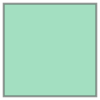

In [17]:
simple_geom = simplify_by_interior_angle(degenerate_geom)
simple_geom

[90.0, 90.0, 90.0]
[(0.0, 0.0), (0.0, 10.0), (10.0, 10.0), (10.0, 0.0), (0.0, 0.0)]
5

[(0.0, 0.0), (0.0, 10.0), (10.0, 10.0), (10.0, 0.0), (0.0, 0.0)]


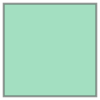

In [18]:
pass2 = simplify_by_interior_angle(simple_geom)
pass2

[0.0, 0.0, 90.0, 0.0, 0.0, 90.0, 0.0, 0.0, 90.0, 0.0, 0.0]
[(0.0, 0.0), (3.7, 0.0), (7.9, 0.0), (10.0, 0.0), (10.0, 0.9), (10.0, 5.8), (10.0, 10.0), (5.4, 10.0), (0.6, 10.0), (0.0, 10.0), (0.0, 8.6), (0.0, 2.3), (0.0, 0.0)]
13

[(0.0, 0.0), (10.0, 0.0), (10.0, 10.0), (0.0, 10.0), (0.0, 0.0)]


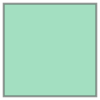

In [19]:
simple_geom = simplify_by_interior_angle(dg2)
simple_geom

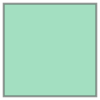

In [20]:
simple_geom

In [21]:
sdg2 = dg2.simplify(tolerance=1e-10)

In [22]:
print(sdg2.exterior.coords[:])

[(0.0, 0.0), (10.0, 0.0), (10.0, 10.0), (0.0, 10.0), (0.0, 0.0)]


In [23]:
# generate degenerate polys given vertices

# # try random geoms

In [33]:
test_poly1_coords = [[-156.01, 19.62], [-156.03, 19.66], [-156.05, 19.70], [-156.01, 19.78], [-156.01, 19.70], [-156.01, 19.62]]
test_poly1 = sg.Polygon(test_poly1_coords)
test_pt1 = [sg.Point(x) for x in test_poly1_coords]
test_mpt1 = sg.MultiPoint(test_pt1)


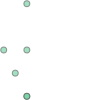

In [34]:
test_mpt1

In [38]:
test_poly1_simp = simplify_by_interior_angle(test_poly1)

In [40]:
len(test_poly1.exterior.coords[:])


6

In [42]:
print(test_poly1_simp.exterior.coords[:])

[(-156.01, 19.62), (-156.05, 19.7), (-156.01, 19.78), (-156.01, 19.62)]


In [46]:
after = test_poly1.simplify(1e-5)
len(after.exterior.coords[:])

5

In [47]:
def poly_as_mpt(polygon):
    coords = polygon.exterior.coords[:]
    as_pts = [sg.Point(x) for x in coords]
    as_mpt = sg.MultiPoint(as_pts)
    return as_mpt

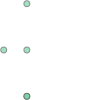

In [48]:
poly_as_mpt(after)

In [63]:
# Case 1: the point at (0, 0.5) is removed.
coords = [(0, 0), (0, 0.5), (0, 1), (1, 1), (1, 0)]
polygon1 = shapely.geometry.Polygon(coords)
simplified_polygon1 = polygon1.simplify(1e-5)

# Case 2: the point at (0, 0.5) is not removed.
coords = coords[1:] + [coords[0]]
polygon2 = shapely.geometry.Polygon(coords)
simplified_polygon2 = polygon2.simplify(1e-5)

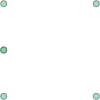

In [66]:
poly_as_mpt(simplified_polygon2)

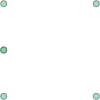

In [68]:
poly_as_mpt(simplify_by_interior_angle(simplified_polygon2))

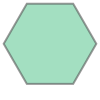

In [72]:
def create_hexagon(l, x, y):
    """
    Create a hexagon centered on (x, y)
    :param l: length of the hexagon's edge
    :param x: x-coordinate of the hexagon's center
    :param y: y-coordinate of the hexagon's center
    :return: The polygon containing the hexagon's coordinates
    """
    c = [[x + math.cos(math.radians(angle)) * l, y + math.sin(math.radians(angle)) * l] for angle in range(0, 360, 60)]
    return sg.Polygon(c)
hex1 = create_hexagon(5,10,10)
hex1

In [259]:
def generate_degen(geom):
    
    pps=5 # points per side
    
    
#     get normalized vec values
    coords = geom.exterior.coords[:]
    coords_arr = np.array(coords)
    vector_rep = np.diff(coords_arr,axis = 0)
    distances = np.linalg.norm(vector_rep,axis = 1)
    
    idx_dict = {"distance":0, 
               "vector":1,
               "coords":2}
    
    final_coords=[]
    for e,d_v_c in enumerate(zip(distances,vector_rep,coords_arr)):
        d= d_v_c[idx_dict['distance']]
        v = d_v_c[idx_dict['vector']]
        c = d_v_c[idx_dict['coords']]
#         print(c)
        u = v/d
        side_pts = np.random.randint(1,d*10,(pps))/10 # dont want a chance of zero 
        new_offset = [c + u*du for du in side_pts]
#         print(new_offset)
        final_coords+= [c] + new_offset #+ list(coords[e+1])
        
    return final_coords
#         print(u)
        

In [260]:
after = generate_degen(hex1)

In [261]:
after

[array([15., 10.]),
 array([12.7       , 13.98371686]),
 array([12.65     , 14.0703194]),
 array([12.55      , 14.24352448]),
 array([14.4       , 11.03923048]),
 array([13.95      , 11.81865335]),
 array([12.5       , 14.33012702]),
 array([ 8.1       , 14.33012702]),
 array([12.        , 14.33012702]),
 array([10.1       , 14.33012702]),
 array([ 8.3       , 14.33012702]),
 array([12.2       , 14.33012702]),
 array([ 7.5       , 14.33012702]),
 array([ 6.35      , 12.33826859]),
 array([ 6.9       , 13.29089653]),
 array([ 5.8       , 11.38564065]),
 array([ 5.65      , 11.12583302]),
 array([ 5.3       , 10.51961524]),
 array([ 5., 10.]),
 array([6.85      , 6.79570601]),
 array([7.1      , 6.3626933]),
 array([5.4       , 9.30717968]),
 array([7.4       , 5.84307806]),
 array([5.95      , 8.35455173]),
 array([7.5       , 5.66987298]),
 array([9.2       , 5.66987298]),
 array([11.5       ,  5.66987298]),
 array([12.        ,  5.66987298]),
 array([9.8       , 5.66987298]),
 array([

In [263]:
after_pts = [sg.Point(x) for x in after]
after_mpts = sg.MultiPoint(after_pts)

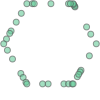

In [264]:
after_mpts

In [234]:
list(coords[0])

[0, 0.5]

In [211]:
u2 = vec1[2]/nv[2]
side2 = np.random.randint(0,nv[2]*10,(pps))/10
new_hex_pts2 = [hexarr[2] + u2*du for du in side2]


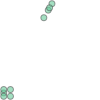

In [216]:
lel = new_hex_pts2 + coords
lelp = [sg.Point(x) for x in lel]
sg.MultiPoint(lelp)

In [214]:
coords

[(0, 0.5), (0, 1), (1, 1), (1, 0), (0, 0)]

NameError: name 'd_v_c' is not defined

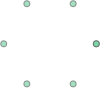

In [74]:
poly_as_mpt(hex1)

In [80]:
hexcoords = hex1.exterior.coords[:]
hexarr= np.array(hexcoords)

In [99]:
vec1 = np.diff(hexarr,axis = 0)
nv = np.linalg.norm(vec1,axis=1) #actually distances lol


In [110]:
vec1[:,1]

array([ 4.33012702e+00,  1.77635684e-15, -4.33012702e+00, -4.33012702e+00,
        0.00000000e+00,  4.33012702e+00])

In [113]:
u1 = vec1[0]/nv[0]

In [126]:
new_pt = hexarr[0] + 5*u1
new_pt

array([12.5       , 14.33012702])

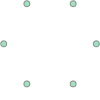

In [127]:
poly_as_mpt(hex1).union(sg.Point(new_pt))

In [128]:
u1*5

array([-2.5       ,  4.33012702])

In [129]:
pps=4
d = nv[0]
side = np.random.randint(0,d*10,(pps))/10

In [184]:
new_hx_pts = [hexarr[0] + u1*du for du in side]

u2 = vec1[2]/nv[2]
side2 = np.random.randint(0,nv[2]*10,(pps))/10
new_hex_pts2 = [hexarr[2] + u2*du for du in side2]



In [187]:
final_hx = new_hex_pts2 + new_hx_pts

In [188]:
new_hx_aspts = [sg.Point(x) for x in final_hx]
new_hx_asmpts = sg.MultiPoint(new_hx_aspts)

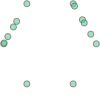

In [190]:
testhex = poly_as_mpt(hex1).union(new_hx_asmpts)
testhex

In [148]:
testhex_poly = sg.Polygon(testhex)

In [156]:
testpoly = testhex.convex_hull

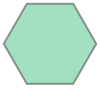

In [159]:
testpoly

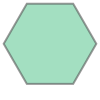

In [173]:
testpoly.simplify(0.5)

In [181]:
testpoly.simplify(0.5).exterior.coords[:]

[(7.499999999999998, 5.669872981077807),
 (5.0, 10.0),
 (7.500000000000001, 14.330127018922195),
 (12.5, 14.330127018922193),
 (15.0, 10.0),
 (12.5, 5.669872981077807),
 (7.499999999999998, 5.669872981077807)]

In [180]:
simplify_by_interior_angle(testpoly).exterior.coords[:]

[(7.499999999999998, 5.669872981077807),
 (5.0, 10.0),
 (7.500000000000001, 14.330127018922195),
 (12.5, 14.330127018922193),
 (15.0, 10.0),
 (12.5, 5.669872981077807),
 (7.499999999999998, 5.669872981077807)]